In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
# Load the MNIST dataset below
#mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
np.random.seed(123)

indices = np.random.choice(len(mnist.data), 10000)
X = mnist.data.loc[indices] / 255.0 # Divide by 255 to normalize for RGB (red, green, blue) in image data
y = mnist.target.loc[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


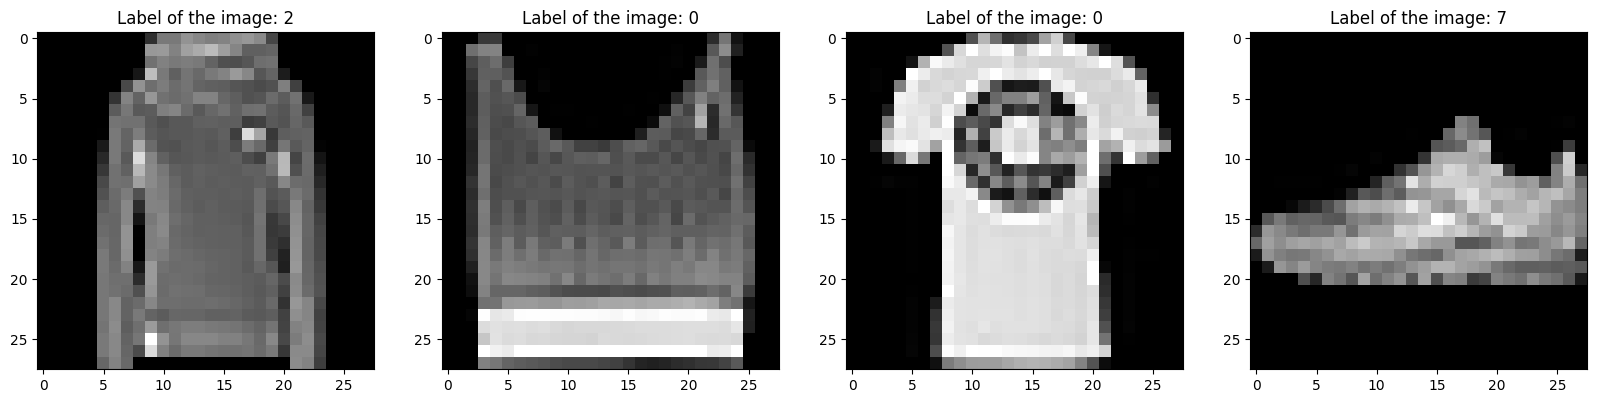

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X.iloc[123].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[123]))

plt.subplot(142)
plt.imshow(X.iloc[124].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[124]))

plt.subplot(143)
plt.imshow(X.iloc[125].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[125]))

plt.subplot(144)
plt.imshow(X.iloc[126].values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[126]))

plt.show()

In [6]:
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

In [7]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

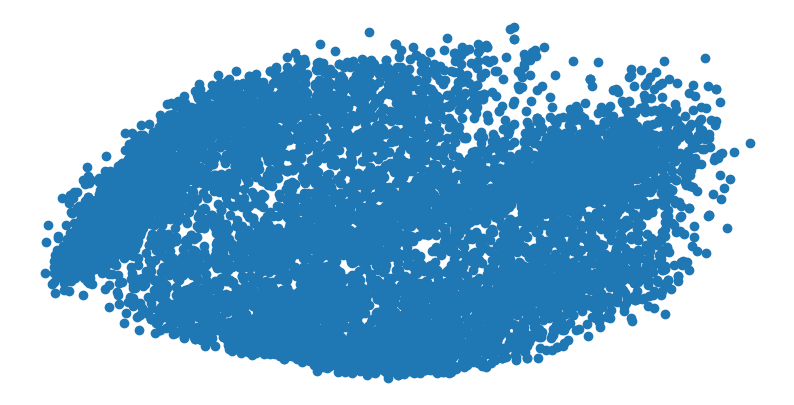

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Example solution:
https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/7.solution_pca.ipynb

Unfortunately the graph above doesn't enable us to infer the classes through visualization. As can be seen in the colored and labeled graph, PCA can gather together the observations of the same classes to some degree. However, observations from all of the classes intertwined each other and can't be distinguished without coloring or labeling. In this respect, PCA solution is not satisfactory.